In [16]:
import os

def allaudiofiles(directory, audio_extensions=['.wav', '.mp3', '.flac', '.aac', '.ogg']):
    lista = []
    index = 0
    maxim = 2
    for root, _, files in os.walk(directory):
        if index == maxim:
            break
        for file in files:
            if index == maxim:
                break
            # Check if the file has a valid audio extension
            if any(file.lower().endswith(ext) for ext in audio_extensions):
                index = index + 1
                lista.append(os.path.join(root, file))
    return lista


directory = "um/"  # Replace with your directory path
file_name = "../1-137-A-32.wav"
files = [file_name]#allaudiofiles(directory)
files

['../1-137-A-32.wav']

In [8]:
import librosa
import numpy as np
audios = []
times = []
np.maximum
for i, file in enumerate(files):
    audio, sr = librosa.load(file, sr=None)
    duration = librosa.get_duration(y=audio, sr=sr) / sr
    #if i == 0:
    #    plt.plot(audio, "-", color="blue", label="reconstrcuted", lw=2)

    print("iter {} file name{}".format(i, file))
    print(audio.shape)
    print(librosa.stft(audio).shape)
    a = librosa.stft(audio)
    print(a.shape)
    audios.append(a)
    aux_time = []
    curr_time = 0
    for value in audio:
        aux_time.append(curr_time)
        curr_time = curr_time + duration
    times.append(aux_time)
audios = np.asarray(audios)
times = np.asarray(times)

iter 0 file name../1-137-A-32.wav
(220500,)
(1025, 431)
(1025, 431)


In [ ]:
from sklearn.decomposition import SparseCoder, DictionaryLearning
import matplotlib.pyplot as plt

alpha = 0.1
transform_alpha = alpha
dictionary = DictionaryLearning(n_components=100, random_state=7701, alpha=alpha, fit_algorithm="lars", transform_algorithm="lasso_lars", transform_alpha=transform_alpha)
dictionary.fit(np.real(audios[0]))

dictionary_cd = DictionaryLearning(n_components=100, random_state=7701, alpha=alpha, fit_algorithm="cd", transform_algorithm="lasso_cd", transform_alpha=transform_alpha)
dictionary_cd.fit(np.real(audios[0]))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 29 iterations, alpha=3.100e-04, previous alpha=2.961e-04, with an active set of 30 regressors.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 41 iterations, alpha=3.544e-04, previous alpha=3.544e-04, with an active set of 40 regressors.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 28 iterations, alpha=2.773e-04, previous alpha=2.618e-04, with an active set of 

DictionaryLearning(alpha=0.1, fit_algorithm='cd', n_components=100,
                   random_state=7701, transform_algorithm='lasso_cd',
                   transform_alpha=0.1)

In [28]:
coder = SparseCoder(dictionary=dictionary.components_, transform_alpha=transform_alpha,transform_algorithm="lasso_lars")
#density = len(np.flatnonzero(x))
#x = np.ravel(np.dot(x, D_fixed))
x = coder.transform(np.real(audios[0]))
reconstructed_signal = np.dot(x, dictionary.components_)
reconstructed_audio = librosa.istft(reconstructed_signal)
coder_cd = SparseCoder(dictionary=dictionary_cd.components_, transform_alpha=transform_alpha,transform_algorithm="lasso_lars")
#density = len(np.flatnonzero(x))
#x = np.ravel(np.dot(x, D_fixed))
x_cd = coder.transform(np.real(audios[0]))
reconstructed_signal_cd = np.dot(x, dictionary_cd.components_)
reconstructed_audio_cd = librosa.istft(reconstructed_signal_cd)

print(x.shape)
print(dictionary.components_.shape)
print(reconstructed_signal.shape)
print(reconstructed_audio.shape)

(1025, 100)
(100, 431)
(1025, 431)
(220160,)


(1025, 431)
(220160,)
(220160,)


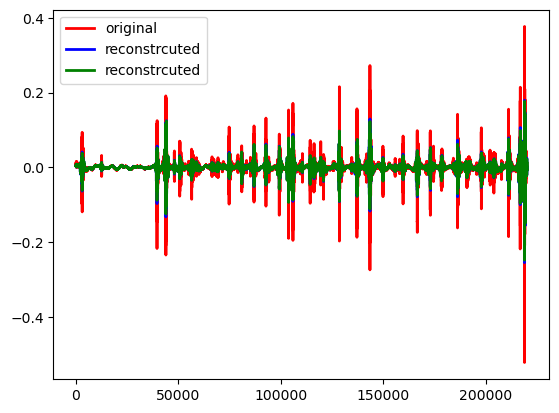

In [ ]:
orig = librosa.istft(audios[0])
print(reconstructed_signal.shape)
print(reconstructed_audio.shape)
print(orig.shape)
#squared_error = np.sum(audios - x) ** 2
plt.plot(
            orig,
            "-",
            color="red",
            lw=2,
            label="original",
            #label="%s: %s nonzero coefs,\n%.2f error" % ("pff", density, squared_error),
        )
plt.plot(reconstructed_audio, "-", color="blue", label="reconstrcuted", lw=2)
plt.plot(reconstructed_audio_cd, "-", color="green", label="reconstrcuted with cd", lw=2)
plt.legend()
plt.show()

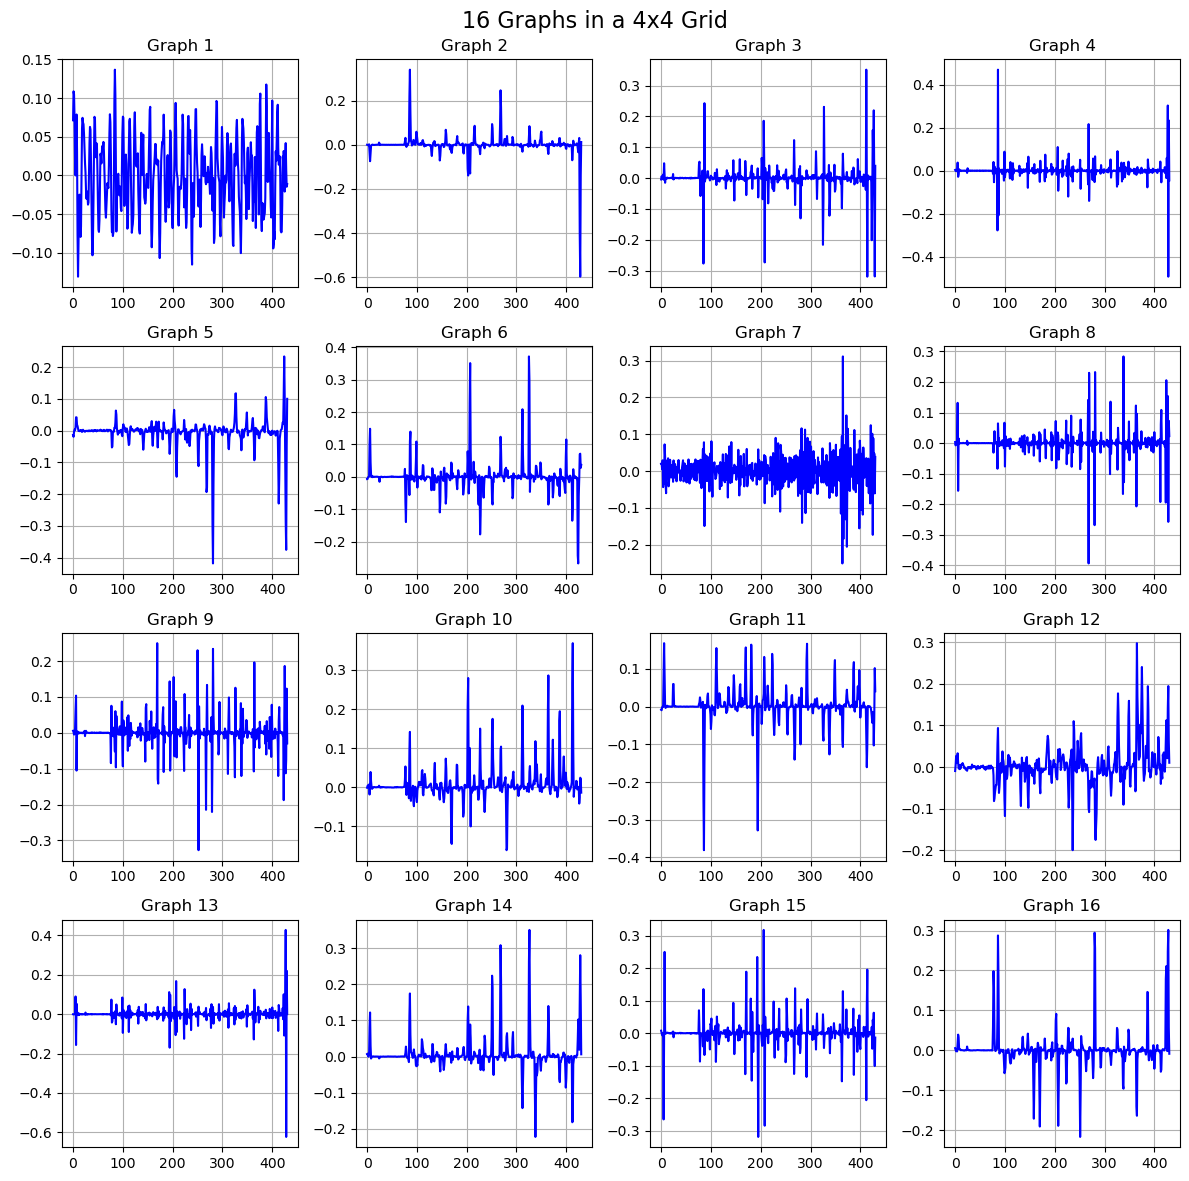

In [ ]:
#plt.plot(dictionary.components_[1], "-", color="blue", label="component", lw=2)

fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4 rows, 4 columns
fig.suptitle('16 Graphs in a 4x4 Grid', fontsize=16)  # Main title

# Generate some data
x = np.linspace(0, 10, 100)

# Loop through each subplot and plot a graph
for i in range(4):
    for j in range(4):
        # Create a unique function for each subplot
        axes[i, j].plot(dictionary.components_[i*4+j], color='blue')  # Plot the graph
        axes[i, j].set_title(f'Graph {i*4 + j + 1}')  # Set subplot title
        axes[i, j].grid(True)  # Add grid

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [17]:
import soundfile as sf
sf.write('um/reconstructed_audio.wav', reconstructed_audio, sr)
print("{} bytes".format(os.path.getsize(file_name)))
print("{} bytes".format(os.path.getsize('um/reconstructed_audio.wav')))
print("{} bytes".format(os.path.getsize(file_name)-os.path.getsize('um/reconstructed_audio.wav')))
# could this be a valid metric????



441044 bytes
440364 bytes
680 bytes


In [18]:
from sklearn.metrics import mean_squared_error

print("MSE: {}".format(mean_squared_error(orig, reconstructed_audio)))
print("Average orig: {} \n\tAverage recons: {} \n\tAverage Difference: {}".format(np.average(orig), np.average(reconstructed_audio),(np.average(orig) - np.average(reconstructed_audio))))

MSE: 4.811132384929806e-05
Average orig: 1.976434577954933e-05 
	Average recons: 1.3146861419954803e-05 
	Average Difference: 6.617484359594528e-06


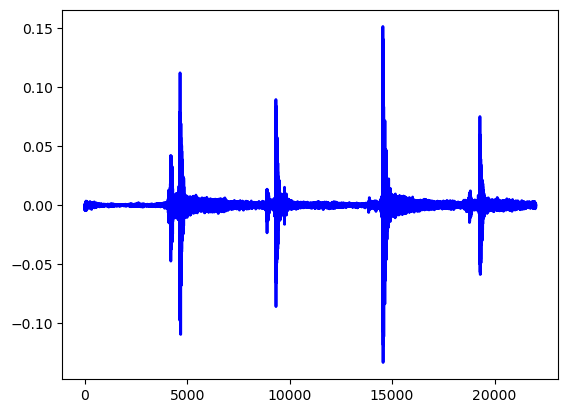

In [ ]:
#a,sr = librosa.load("um/5-209698-A-38.wav")

#plt.plot(librosa.istft(librosa.stft(a)), "-", color="blue", label="reconstrcuted", lw=2)

#similarity in frequency domain - multiply the two signaks abd tajee fft ths will show if the signals share smilitarty 
#similarity in frequency domain - take fft of both multiply and sum